In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Retrieving the best Run

In [2]:
import wandb 

# Use the wandb Api to retrieve the run that resulted in the best ELBO on validation for the sweep m0y9l5op
api = wandb.Api()
best_run = api.sweep('mfederici/mnist_examples/m0y9l5op').best_run()

/home/marco/anaconda3/envs/jade/lib/python3.8/site-packages/wandb/apis/public.py:1445: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(self._attrs["config"])
wandb: Sorting runs by -summary_metrics.ELBO/Validation


In [3]:
# Print the url of the best run to access the corresponding wandb board
print(best_run.url)

https://wandb.ai/mfederici/mnist_examples/runs/scp6gycl


In [4]:
# The train log can be obtained calling the hystory() method
train_log = best_run.history(keys=['trainer/global_step', 'Train/reconstruction', 'Train/regularization'])
train_log

,_step,trainer/global_step,Train/reconstruction,Train/regularization
0,2,49,747.040039,0.494029
1,3,99,746.978149,0.515793
2,4,149,747.104553,1.289093
3,5,199,745.620056,1.483069
4,6,249,744.140503,1.715376
...,...,...,...,...
73,75,3699,731.652466,7.509735
74,76,3749,731.974854,7.690782
75,77,3799,731.648254,7.598278
76,78,3849,732.370544,8.013418


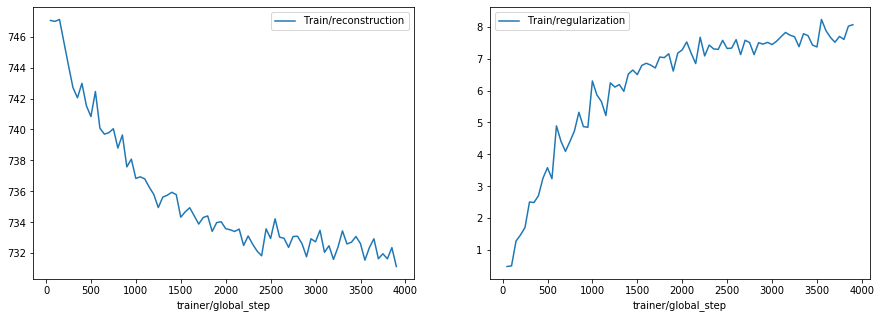

In [5]:
# We visualize train reconstruction and regularization error
f, ax = plt.subplots(1,2, figsize=(15,5))

train_log.plot(x='trainer/global_step', y='Train/reconstruction', ax=ax[0])
train_log.plot(x='trainer/global_step', y='Train/regularization', ax=ax[1])

# Loading the best model from the checkpoint

In [7]:
from code.utils.wandb_utils import load_checkpoint

# We determine the id of the best run
run_path = 'mfederici/mnist_examples/%s'%best_run.id

# instantiate the 'model' compoment from the checkpoint 'epoch=9-step=3909.ckpt' (in files/checkpoints on wandb)
model = load_checkpoint(
    run_path=run_path, 
    checkpoint='epoch=9-step=3909.ckpt', 
    component_name='model') 

In [8]:
# Print the model structure
model

VariationalAutoencoder(
  (encoder): Encoder(
    (net): Sequential(
      (0): Flatten()
      (1): Linear(in_features=784, out_features=1024, bias=True)
      (2): ReLU(inplace=True)
      (3): Linear(in_features=1024, out_features=128, bias=True)
      (4): ReLU(inplace=True)
      (5): StochasticLinear(in_features=128, out_features=128, bias=True)
    )
  )
  (decoder): Decoder(
    (net): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=128, out_features=1024, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=1024, out_features=784, bias=True)
      (5): Reshape()
    )
  )
  (prior): DiagonalNormal()
)

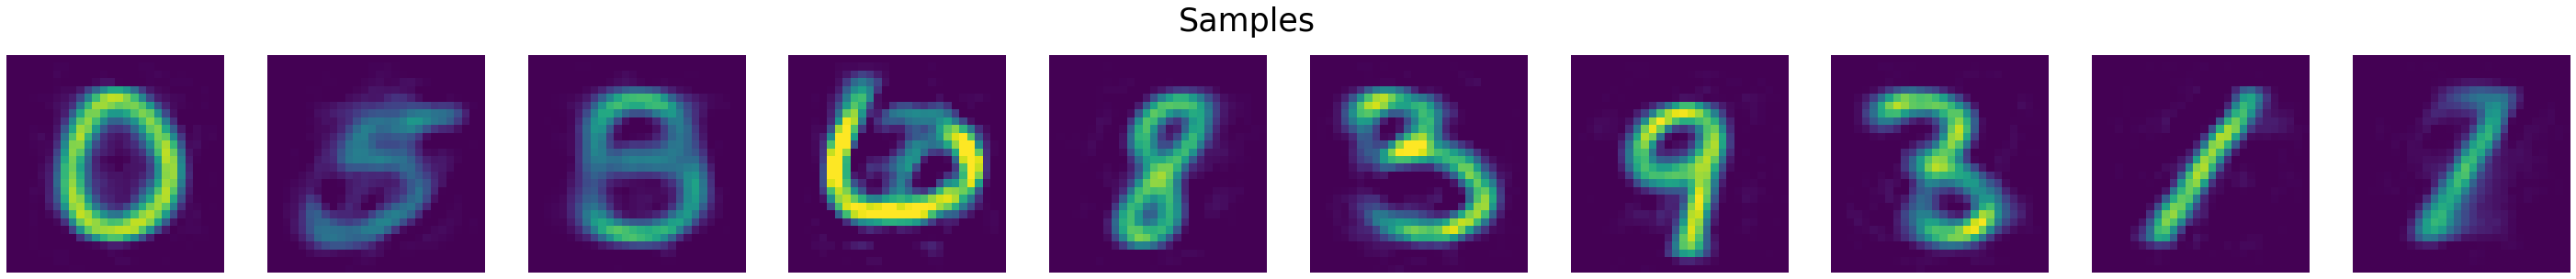

In [62]:
# Generate some samples
n_samples = 10
samples = model.sample([n_samples])

f, ax = plt.subplots(1,n_samples, figsize=(5*n_samples, 5))

f.suptitle('Samples', size=35)
for i in range(len(ax)):
    ax[i].imshow(samples[i].reshape(28,28).data, clim=(0,1));
    ax[i].axis('off')


In [9]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# Load the MNIST dataset
dataset = MNIST('/data', transform=ToTensor())

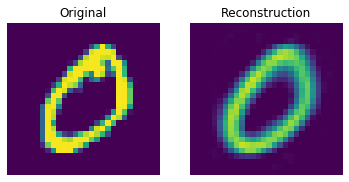

In [64]:
# Show the model reconstructions

x, y = dataset[1]
x_rec = model.reconstruct(x)

f, ax = plt.subplots(1,2)

ax[0].imshow(x.view(28,28).data, clim=(0,1))
ax[1].imshow(x_rec.view(28,28).data, clim=(0,1))

ax[0].set_title('Original')
ax[1].set_title('Reconstruction')

ax[0].axis('off')
ax[1].axis('off');